## 1. Installing

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#metrics and split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB


## 2. Data Preperation

In [53]:
df = pd.read_csv('german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [54]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [55]:
df.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


### Missing Values Analysis

In [57]:
#mode of Saving Accounts attribute

mode_sav = df['Saving accounts'].mode()
mode_sav

0    little
Name: Saving accounts, dtype: object

In [58]:
df['Saving accounts'].fillna(mode_sav[0], inplace=True)

In [59]:
df['Saving accounts'].isnull().sum()

0

In [60]:
#mode of Checking Accouny
mode_check = df['Checking account'].mode()
mode_check

0    little
Name: Checking account, dtype: object

In [61]:
df['Checking account'].fillna(mode_check[0], inplace=True)

In [62]:
df['Checking account'].isnull().sum()

0

In [81]:
#labels
lab = df["Risk"].value_counts().keys().tolist()
#values
val = df["Risk"].value_counts().values.tolist()

trace = go.Pie(labels = lab, values = val, marker = dict(colors = [ 'royalblue','lime'], line = dict(color ="white",width =2)),
               rotation = 100,hoverinfo = "label+value+text", textinfo='label+percent',hole = .5)

layout = go.Layout(dict(title = "Risk Count",paper_bgcolor = "rgb(243,243,243)", plot_bgcolor  = "rgb(243,243,243)"))
                        
data = [trace]

fig = go.Figure(data = data,layout = layout)

py.iplot(fig)

### Label Encoding & One-Hot Encoding

In [64]:
df.Sex =  np.where(df.Sex =='male',1,0)

In [65]:
df.Dummies_Housing = pd.get_dummies(df['Housing'])
df.Dummies_Housing.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_6792\358075565.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,free,own,rent
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [66]:
df.Dummies_Saving = pd.get_dummies(df['Saving accounts'])
df.Dummies_Saving.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_6792\3063880560.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,little,moderate,quite rich,rich
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [67]:
df.Dummies_Checking = pd.get_dummies(df['Checking account'])
df.Dummies_Checking.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_6792\2855978765.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,little,moderate,rich
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [68]:
df.Dummies_Purpose = pd.get_dummies(df['Purpose'])
df.Dummies_Purpose.head()

C:\Users\vanhu\AppData\Local\Temp\ipykernel_6792\1742222251.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0


In [69]:
df = pd.concat([df,df.Dummies_Housing,df.Dummies_Saving,df.Dummies_Checking, df.Dummies_Purpose], axis=1)
df.drop(columns=['Housing', 'Saving accounts', 'Checking account', 'Purpose'], inplace=True)
df.head()

,Age,Sex,Job,Credit amount,Duration,Risk,free,own,rent,little,...,moderate,rich,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1169,6,good,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,bad,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,good,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,good,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,bad,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [82]:
df

,Age,Sex,Job,Credit amount,Duration,Risk,free,own,rent,little,...,moderate,rich,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1169,6,good,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,bad,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,good,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,good,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,bad,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1736,12,good,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
996,40,1,3,3857,30,good,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
997,38,1,2,804,12,good,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
998,23,1,2,1845,45,bad,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Correlation and Heatmap Analysis

Để thấy rằng các features là độc lập có điều kiện với nhau (ĐK áp dụng Naive Bayes)

C:\Users\vanhu\AppData\Local\Temp\ipykernel_6792\1698463513.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

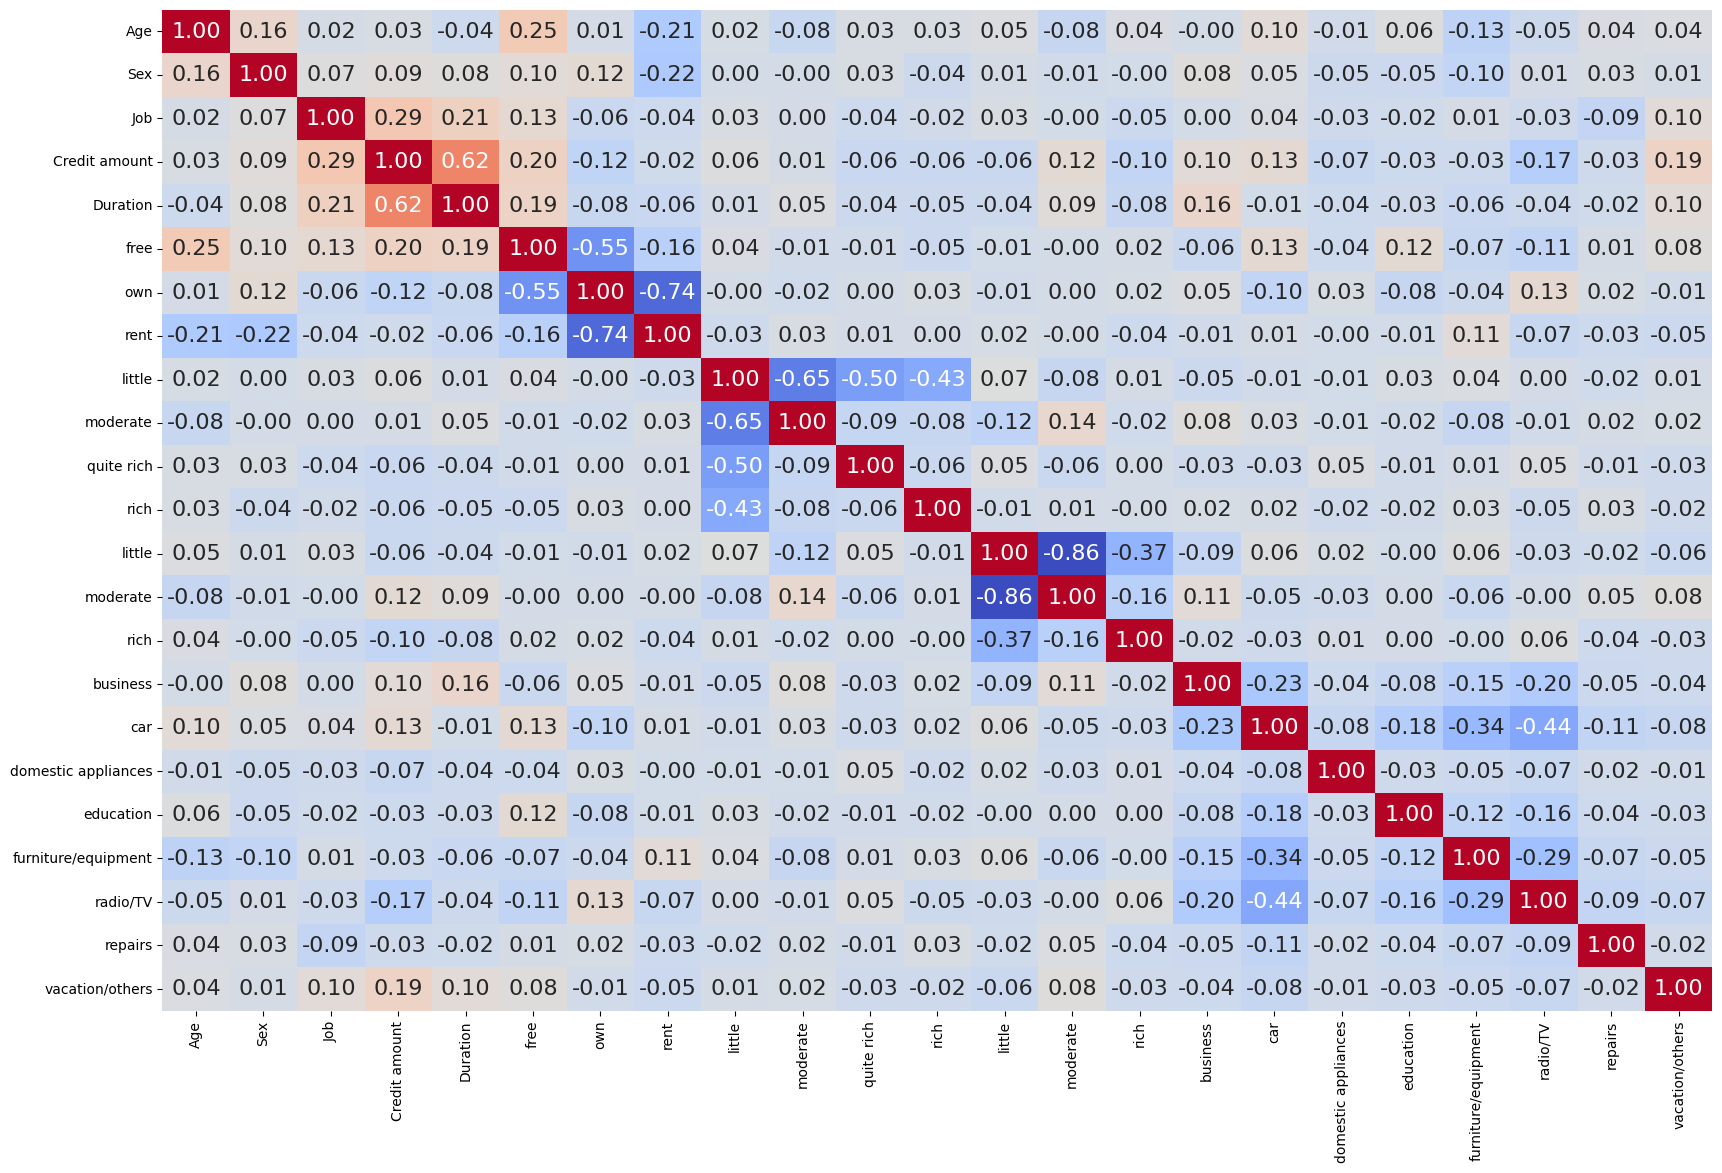

In [70]:
plt.figure(figsize=(20,13))
sns.heatmap(df.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

Nhận thấy mối tương quan của các feartures với nhau khá thấp -> thỏa mãn điều kiện

## 3. Modelling

In [71]:
y = df['Risk']

X = df.drop(columns=['Risk'])
X.head()

,Age,Sex,Job,Credit amount,Duration,free,own,rent,little,moderate,...,moderate,rich,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1169,6,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [72]:
X.columns

Index(['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'free', 'own', 'rent',
       'little', 'moderate', 'quite rich', 'rich', 'little', 'moderate',
       'rich', 'business', 'car', 'domestic appliances', 'education',
       'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
      dtype='object')

In [73]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [74]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

print("Primitive error evaluation accuracy score: ", model.score(X_train, y_train))

y_pred = model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

print ("Accuracy of KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Primitive error evaluation accuracy score:  0.672
Test predict accuracy score:  0.648 

Confussion Matrix: 
 [[ 29  43]
 [ 45 133]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

         bad       0.39      0.40      0.40        72
        good       0.76      0.75      0.75       178

    accuracy                           0.65       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.65      0.65      0.65       250

Accuracy of KNN: 64.80 %


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=10, p = 2)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print ("Accuracy of KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of KNN: 62.40 %


Nhận xét: Bộ dữ liệu đầu vào ít (1000 mẫu) và mất cân bằng tỉ lệ giữa good và bad của Risk nên độ chính xác chưa cao và chênh lệch lớn ở kết quả good-bad của các độ đo

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_dt = dtc.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print ("Accuracy of DCT: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of DCT: 62.00 %


In [77]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
model_nb = GNB.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
print ("Accuracy of DCT: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of DCT: 64.80 %


In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print ("Accuracy of DCT: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of DCT: 69.20 %


c:\Users\vanhu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

model_rf = rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print ("Accuracy of DCT: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of DCT: 65.20 %
